<a href="https://colab.research.google.com/github/PierreCabot/PierreCODER/blob/main/Proyecto_ParteIII_PierreCabot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Entrega final: Fundamentos para la ciencia de datos
#Pierre Cabot

#Predicción de ACV (clasificación binaria)

# - Dependencias

In [840]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#Introducción

 **Descripción:**

 El siguiente dataset fue obtenido de la dirección https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset. Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.

Tiene como por título en inglés "Stroke Prediction Dataset".

 **Contexto:**

Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular es la segunda causa de muerte a nivel mundial y es responsable de aproximadamente el 11% del total de muertes.

**Alcance:**

Este trabajo esta dirigido a profesionales de la salud con el fin de informar y dar a conocer las principales variables que afectan a una persona a la hora de sufrir un ACV.

**Motivación:**

Los problemas de salud nos afecta tanto directa o indirectamente, por lo tanto es desafiante el hecho de que se posean datos respecto a estos accidentes, con el fin de preveenir de que nos ocurra en el caso de estar en condiciones de riesgo.

**Hipótesis/Preguntas**

Factores de riesgo como el fumar o haber fumado durante los años de vida aumenta la probabilidad de tener un ictus y el pertencer a la población femenina aumenta aún más.

¿Puede el estar casado o divorciado aumentar el riesgo de sufrir un ACV?
¿Aquellos que viven en la ciudad sufren más accidentes que los de la zona rural?





#Análisis exploratorio de datos

#Descripción de variables

1) ID: identificador único

2) Gender: "Masculino", "Femenino" u "Otro"

3) Age: edad del paciente

4) Hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión

5) Heart_disease: 0 si el paciente no tiene ninguna enfermedad cardíaca, 1 si el paciente tiene una enfermedad cardíaca

6) Ever_married: "No" o "Sí"

7) Work_type: "niños", "Govt_jov", "Never_worked", "Privado" o "Autónomo"

8) Residence_type: "Rural" o "Urbana"

9) Avg_glucose_level: nivel promedio de glucosa en sangre

10) BMI: índice de masa corporal

11) Smoke_status: "anteriormente fumó", "nunca fumó", "fuma" o "Desconocido"*

12) Stroke: 1 si el paciente tuvo un ictus o 0 si no

# Data acquisition

In [841]:
url = 'https://github.com/PierreCabot/PierreCODER/raw/main/healthcare-dataset-stroke-data.csv'
df =pd.read_csv(url)
#Se sube el dataset desde github

#Estadística descriptiva

In [842]:
df.shape

(5110, 12)

In [843]:
#El dataset posee 5110 registros con 12 columnas

In [844]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

 Se consulta cuales son cada una de estas columnas

In [845]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [846]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [847]:
# Se puede observar al investigar las características de los datos, de que en la columna "bmi" hay menos datos que los registros totales, esto nos está dando un indicio de la faltante de datos

In [848]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Se hace un análisis estadístico por variables, sin embargo, está incluyendo algunas, que deberían de ser categóricas. Se procede a definirlas como tal

In [849]:
df['hypertension'] = df['hypertension'].astype('category')
df['heart_disease'] = df['heart_disease'].astype('category')
df['stroke']=df['stroke'].astype('category')
df['gender']=df['gender'].astype('category')
df.describe(include='category')

,gender,hypertension,heart_disease,stroke
count,5110,5110,5110,5110
unique,3,2,2,2
top,Female,0,0,0
freq,2994,4612,4834,4861


In [850]:
df.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


In [851]:
df.smoking_status.value_counts()



smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [852]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [853]:
#Total de valores faltantes en registros de "bmi"
df.isna().sum().sort_values(ascending = False)

bmi                  201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

201 valores de  BMI sin registro. Proporción de nulos relativamente baja

#Tratamiento de valores nulos

In [854]:
IMC= df["bmi"]
IMC

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

Se definió una variable IMC, como lo dicen sus siglas en español, índice de masa corporal, con el fin de sustituir los registros faltantes

In [855]:
# Calculo el coeficiente de variación de la columna "BMI"
cv = (IMC.std() / IMC.mean()) * 100

print("Coeficiente de variación de 'BMI':", int(cv))

Coeficiente de variación de 'BMI': 27


In [856]:
#La dispersión de los datos es moderada, por lo que se sustituye los valores nulos por la media de los restantes

In [857]:
IMC= IMC.fillna(IMC.median())

In [858]:
df = df.drop('bmi', axis = 1) #elimino la columna Age del df original que contienen valores faltantes.
data_frame_final=pd.concat([df,IMC], axis=1) #construyo un nuevo df con los valores de Age sin datos faltantes mediante la función pd.concat
data_frame_final

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.6
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,28.1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.5
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0,28.1
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,40.0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,30.6
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0,25.6


In [859]:
data_frame_final.isnull().sum().sort_values(ascending = False)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
bmi                  0
dtype: int64

Los valores faltantes ahora son 0

In [860]:
data_frame_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   smoking_status     5110 non-null   object  
 10  stroke             5110 non-null   category
 11  bmi                5110 non-null   float64 
dtypes: category(4), float64(3), int64(1), object(4)
memory usage: 340.0+ KB


#Análisis de variables

Se comienza a graficar y empezar a averiguar si existe alguna dependencia entre variables


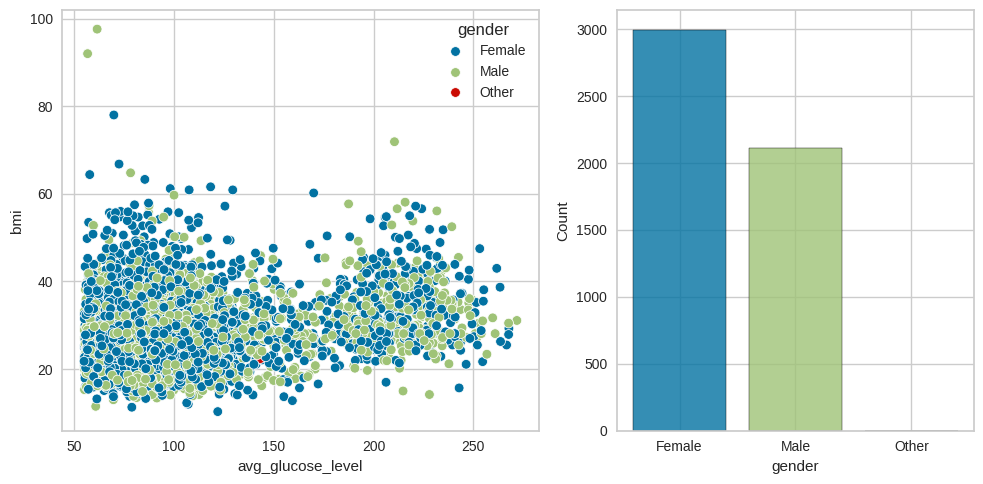

In [861]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data= data_frame_final, x="avg_glucose_level", y="bmi", hue="gender", ax=axs[0])
sns.histplot(data= data_frame_final, x="gender", hue="gender", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

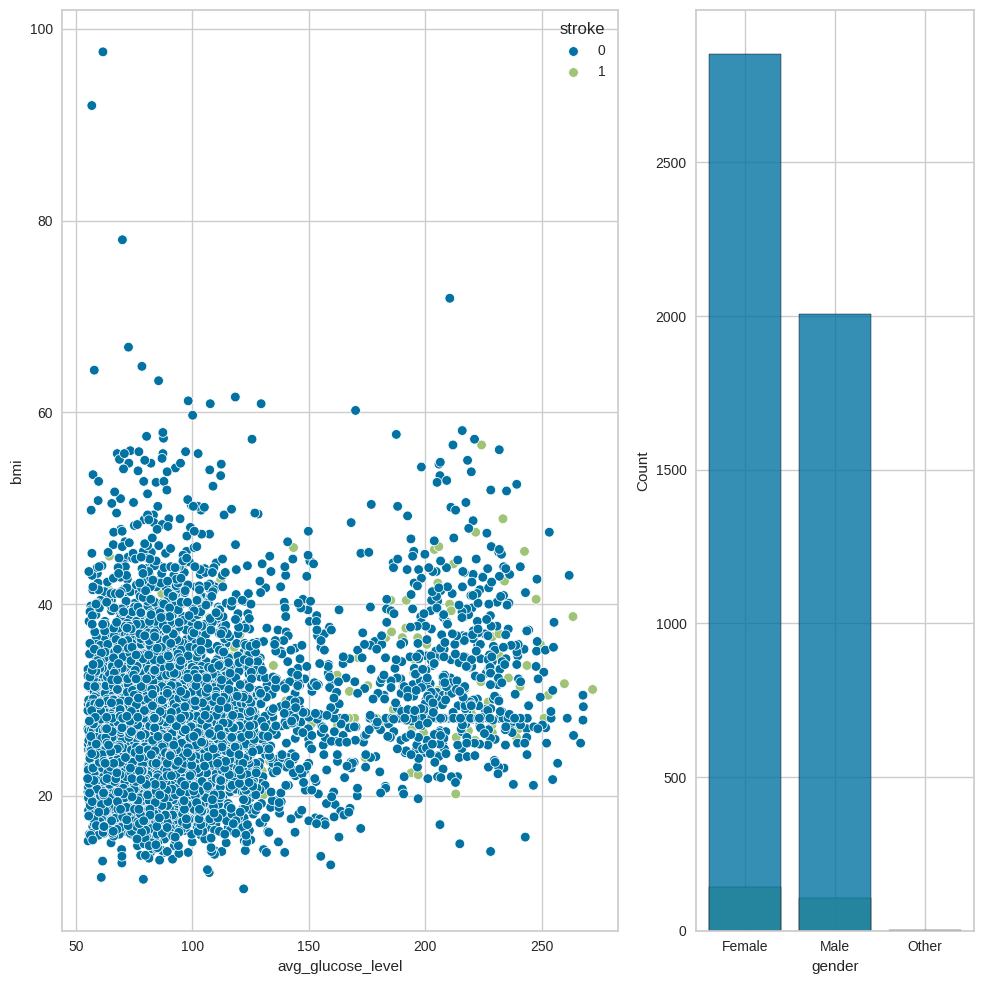

In [862]:
f, axs = plt.subplots(1, 2, figsize=(10, 10), gridspec_kw=dict(width_ratios=[2, 1]))
sns.scatterplot(data= data_frame_final, x="avg_glucose_level", y="bmi", hue="stroke", ax=axs[0])
sns.histplot(data= data_frame_final, x="gender", hue="stroke", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

No existe a simple vista, o no hay suficiente evidencia en los datos para establecer una relación entre IBM y avg_glucose level.

In [863]:
bmi= data_frame_final["bmi"]

<Axes: >

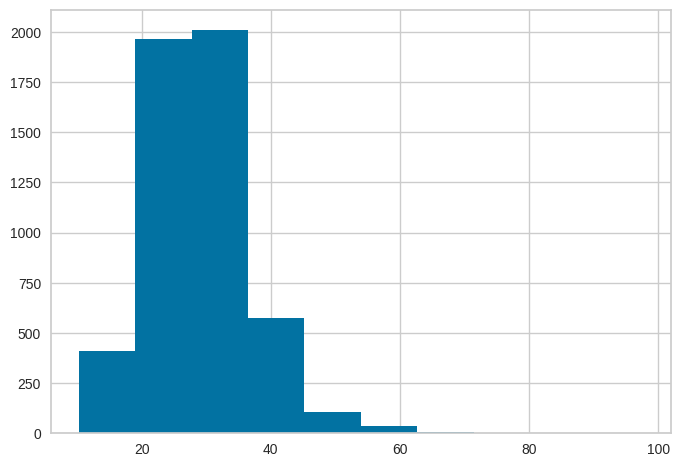

In [864]:
bmi.hist()   # se grafica la distribución de la variable "bmi" de todo el dataset

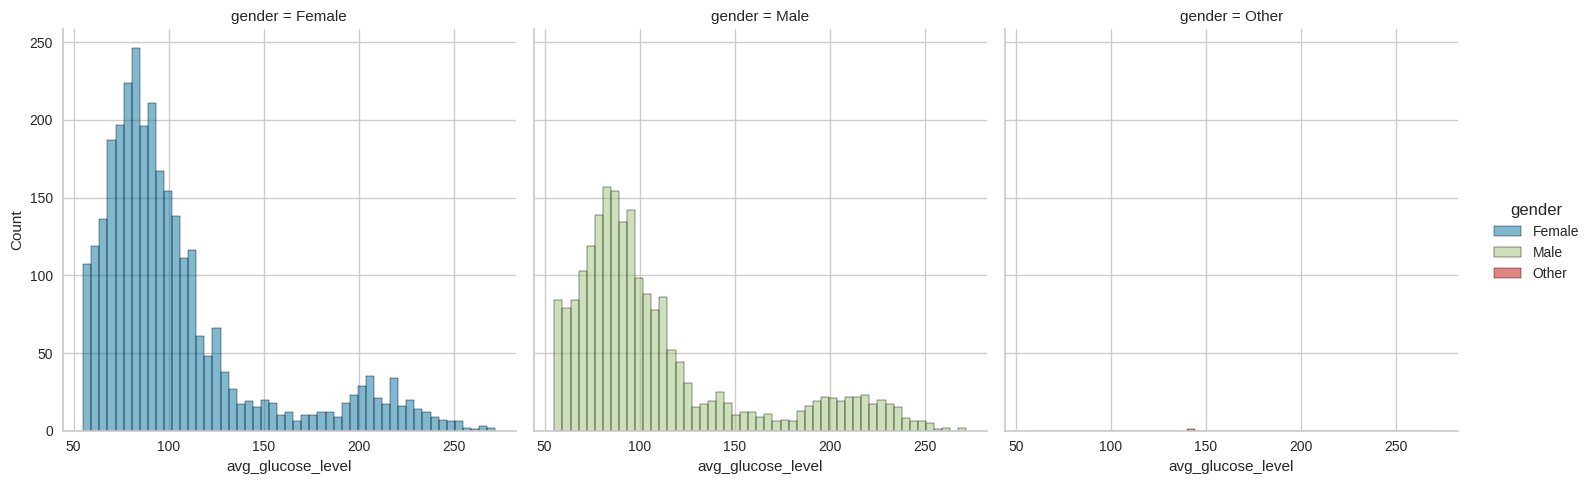

In [865]:
sns.displot(data=data_frame_final, x="avg_glucose_level", hue="gender", col="gender")   # se grafica la distribución de la variable "bmi" y "avg_glucose_level" tanto para hombre como para mujer. Existe el género "otro" pero se omite para el análsis

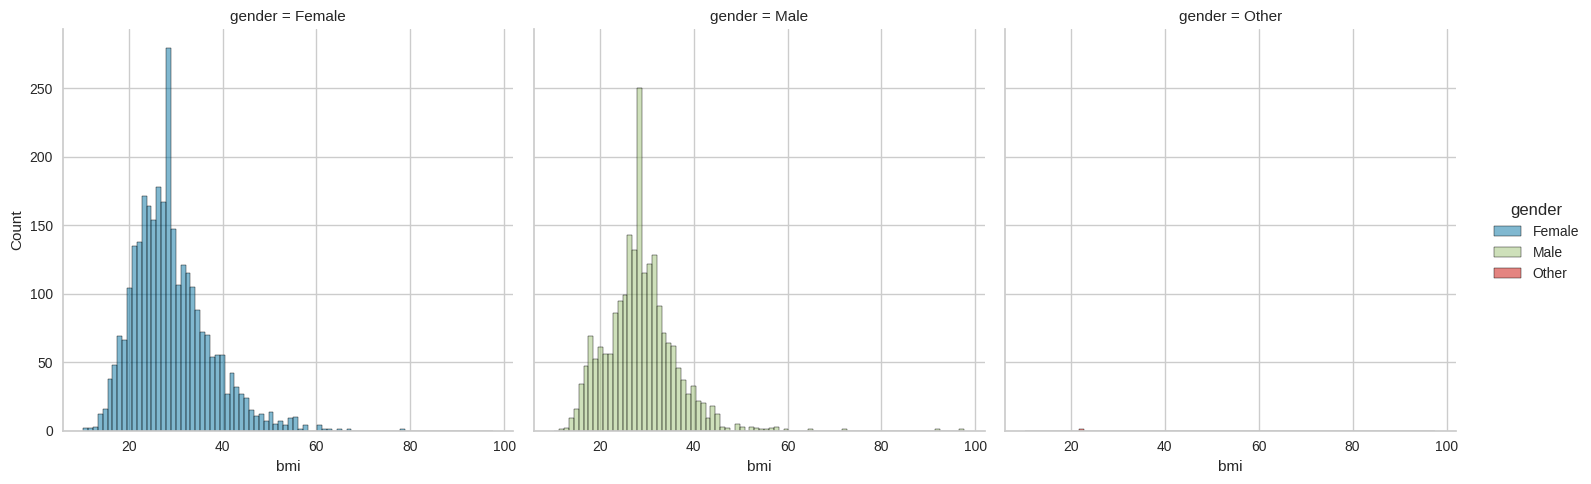

In [866]:
sns.displot(data=data_frame_final, x="bmi", hue="gender", col="gender")

La distribución de glucosa en sangre e índice de masa corporal es similar en ambos sexos.

Se grafican las principales variables categóricas discriminando por sexo para entender su comportamiento

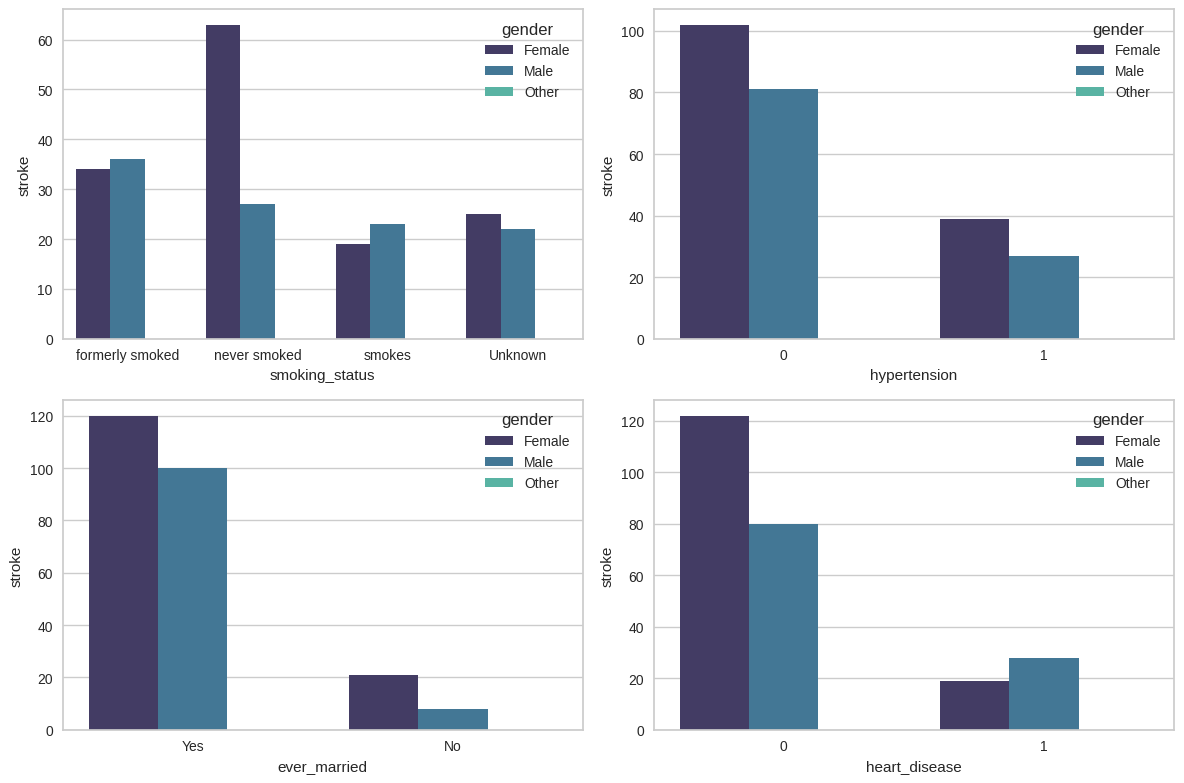

In [867]:
data_frame_final["stroke"]= data_frame_final["stroke"].astype(int)
f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4]))
sns.barplot(data= data_frame_final, x="smoking_status", y="stroke", hue="gender", ax=axs[0,0], errorbar=None, palette= "mako", estimator=np.sum)
sns.barplot(data= data_frame_final, x="hypertension", y="stroke", hue="gender", ax=axs[0,1], errorbar=None, palette= "mako", estimator=np.sum)
sns.barplot(data= data_frame_final, x="ever_married", y="stroke", hue="gender", ax=axs[1,0], errorbar=None, palette= "mako", estimator=np.sum)
sns.barplot(data= data_frame_final, x="heart_disease", y="stroke", hue="gender", ax=axs[1,1], errorbar=None, palette= "mako", estimator=np.sum)
f.tight_layout()

Son varias las conclusiones que se pueden sacar a partir de estos cuatro gráficos de barras. De manera general, la frecuencia de ictus es mayor en las mujeres en todos los casos. Predomina esta tendencia en los datos para las mujeres que nunca fumaron y no tienen hipertensión. Se muestra lo mismo para aquellas que alguna vez estuvieron casadas y tienen alguna enfermedad cardíaca.
La frecuencia de ictus en los hombres es visiblemente menor que en las mujeres.
Se da que en aquellos hombres que son ex-fumadores, mayor tendencia a sufrir un ACV a aquellos que nunca fumaron.

In [868]:
#definimos dos nuevos datasets, ahora separándolos por género
women = data_frame_final[data_frame_final['gender']=='Female']
men = data_frame_final[data_frame_final['gender']=='Male']

print("Cantidad de mujeres", len(women))
print("Cantidad de hombres", len(men))


Cantidad de mujeres 2994
Cantidad de hombres 2115


Se calcula tanto la cantidad de mujeres como de hombres en el registro con el fin de analizar más profundamente los datos.

Text(0.5, 1.0, 'Hombres')

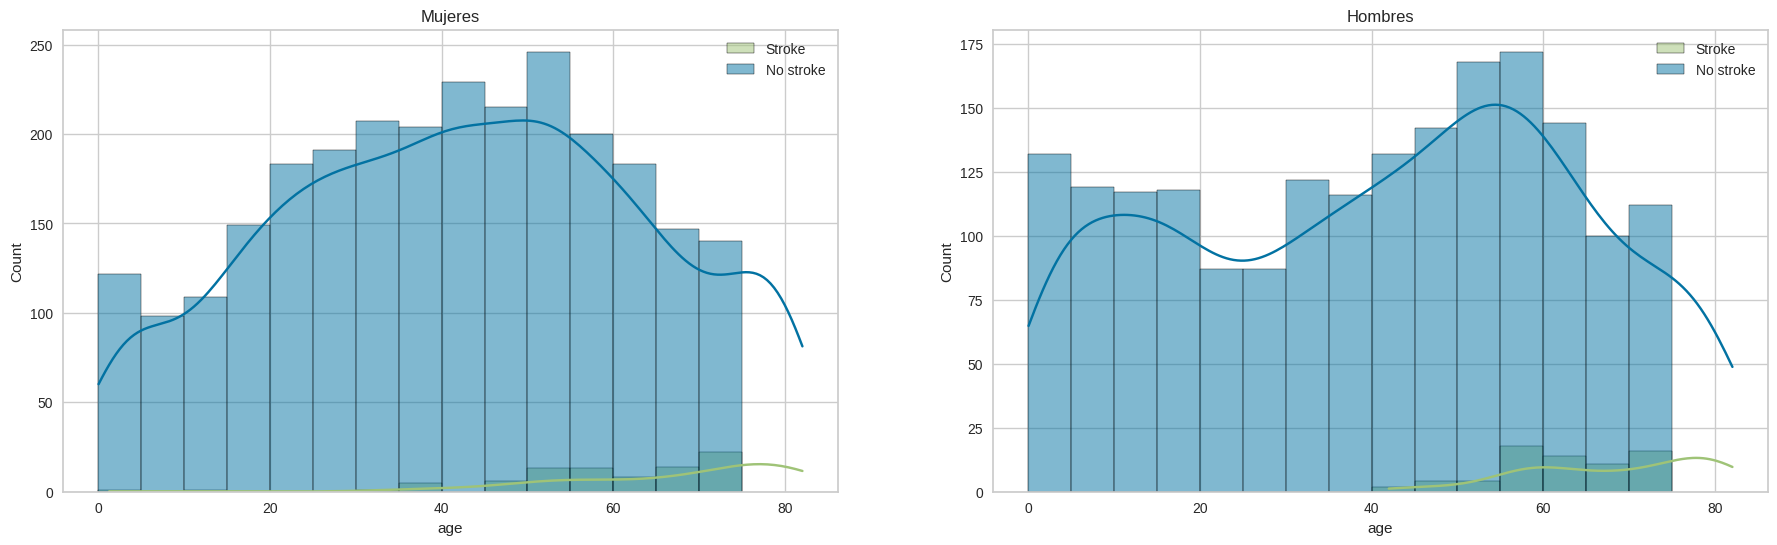

In [869]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(22, 6))
ax = sns.histplot(women[women['stroke']==1].age.dropna(), bins=np.arange(0, 80, 5), label = "Stroke", color='g', ax = axes[0], kde =True)
ax = sns.histplot(women[women['stroke']==0].age.dropna(), bins=np.arange(0, 80, 5), label = "No stroke", color='b', ax = axes[0], kde = True)
ax.legend()
ax.set_title('Mujeres')

ax = sns.histplot(men[men['stroke']==1].age.dropna(), bins=np.arange(0, 80, 5), label = "Stroke",  color='g',ax = axes[1], kde = True)
ax = sns.histplot(men[men['stroke']==0].age.dropna(), bins=np.arange(0, 80, 5), label = "No stroke",  color='b',ax = axes[1], kde = True)
ax.legend()
ax.set_title('Hombres')

En estos dos histogramas se puede observar que aquellos que sufrieron un accidente son mayores de 40 años, esto tanto para los hombres como para las mujeres. Por lo tanto se podría hacer una suposición, que a mayor edad, mayor es la probabilidad de tener un ictus.

In [870]:
cantidad_de_edad_temprana = data_frame_final[data_frame_final['age']<1]   #dados los números de edad y el rango de este, se halla la cantidad de aquellos que son menores a 1 año
print("Cantidad de datos con edad menor a un año",len(cantidad_de_edad_nula))

Cantidad de datos con edad menor a un año 43


In [871]:
Cantidaddemujeresconictus= data_frame_final[ (data_frame_final['stroke']==1) & (data_frame_final['gender']=='Female')]
print( "Cantidad de mujeres con ictus" , len(Cantidaddemujeresconictus))

Cantidad de mujeres con ictus 141


In [872]:
Cantidaddehombresconictus= data_frame_final[ (data_frame_final['stroke']==1) & (data_frame_final['gender']=='Male')]
print( "Cantidad de hombres con ictus" , len(Cantidaddehombresconictus))

Cantidad de hombres con ictus 108


In [873]:
Cantidaddehombres = data_frame_final[data_frame_final['gender']=='Male']
Cantidaddemujeres = data_frame_final[data_frame_final['gender']=='Female']
Porcentajedehombresconictus= (len(Cantidaddehombresconictus)/len(Cantidaddehombres))*100
Porcentajedemujeresconictus= (len(Cantidaddemujeresconictus)/len(Cantidaddemujeres))*100
print("Cantidad de hombres",len(Cantidaddehombres))
print("Cantidad de mujeres",len(Cantidaddemujeres))
print("Porcentaje de hombres con ictus",int(Porcentajedehombresconictus))
print("Porcentaje de mujeres con ictus",int(Porcentajedemujeresconictus))

Cantidad de hombres 2115
Cantidad de mujeres 2994
Porcentaje de hombres con ictus 5
Porcentaje de mujeres con ictus 4


El porcentaje de hombres y mujeres registrados con ictus son similares pero muy bajo en relación al total de datos recabados.

---



In [874]:
Dataset_solo_mujeres=data_frame_final[data_frame_final['gender']=='Female']
Dataset_solo_mujeres

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,28.1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.0
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,never smoked,1,22.8
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,Unknown,1,28.1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,Unknown,0,18.6
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0,28.1
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,40.0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,30.6


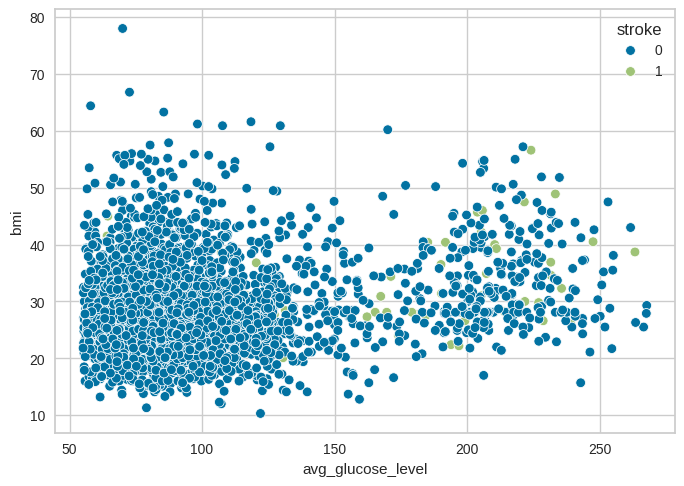

In [875]:
import matplotlib.pyplot as plt
sns.scatterplot(data= Dataset_solo_mujeres, x="avg_glucose_level", y="bmi", hue="stroke")   # se grafica para el caso de las mujeres si hay una relación entre "bmi" y "avg_glucose_level"
f.tight_layout()

In [876]:
#No es evidente visualmente una relación lineal entre las variables "IBM" y "avg_glucose_level" para el género femenino ya sea para aquellas que tuvieron ictus y que no.

In [877]:
Dataset_solo_hombres=data_frame_final[data_frame_final['gender']=='Male']
Dataset_solo_hombres

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.6
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.5
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,formerly smoked,1,29.0
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,never smoked,1,27.4
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,Unknown,1,28.1
...,...,...,...,...,...,...,...,...,...,...,...,...
5097,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,Unknown,0,40.8
5098,579,Male,9.0,0,0,No,children,Urban,71.88,Unknown,0,17.5
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,smokes,0,28.1
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,never smoked,0,28.3


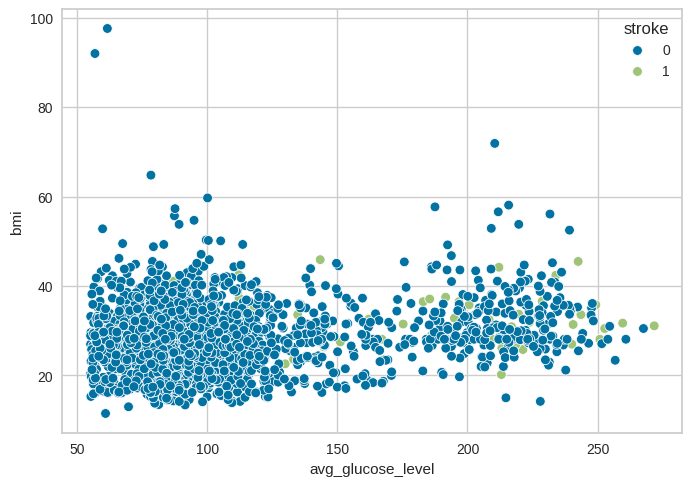

In [878]:
import matplotlib.pyplot as plt
sns.scatterplot(data= Dataset_solo_hombres, x="avg_glucose_level", y="bmi", hue="stroke")
f.tight_layout()

Por la clase de dataset en estudio, los modelos de machine learning a aplicar serán todos del tipo clasifiación, ya que en este caso, queremos predecir si ocurre un hecho o no de ACV. Se aplican los test dados en el curso: árbol de decisión, regresión logística y k-means.

#Modelos

#1- Test sobre árbol de decisión

Dependencias

In [879]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [880]:
#Features/variables independiente
X = data_frame_final[['hypertension','work_type','heart_disease','ever_married','Residence_type','smoking_status','gender']]

#Target/variable dependiente (Variable a predecir)
y = data_frame_final[['stroke']]

In [881]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

In [882]:
X_train.dtypes

hypertension      category
work_type           object
heart_disease     category
ever_married        object
Residence_type      object
smoking_status      object
gender            category
dtype: object

In [883]:
le = LabelEncoder()
X_train = X_train.apply(le.fit_transform)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [884]:
#Testeo de modelo
X_test = X_test.apply(le.fit_transform)
y_pred = clf.predict(X_test)


In [885]:
# Evalúo el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimo el informe de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9471624266144814
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1457
           1       0.27      0.04      0.07        76

    accuracy                           0.95      1533
   macro avg       0.61      0.52      0.52      1533
weighted avg       0.92      0.95      0.93      1533



In [886]:
#Matriz de confusión
preds = clf.predict(X_test)
preds_train = clf.predict(X_train)
cm = confusion_matrix(y_test, preds)

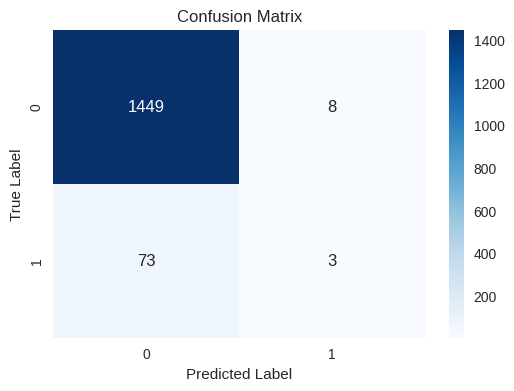

In [887]:
# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [888]:
y.value_counts()

stroke
0         4861
1          249
Name: count, dtype: int64

In [889]:
y.value_counts(normalize=True).round(2)*100

stroke
0         95.0
1          5.0
Name: proportion, dtype: float64

Conclusiones principales: estamos frente a un dataset en que las clases están muy desbalanceadas por lo tanto el accuracy no es fiable.

In [890]:
#Se opta por hallar el f1_score
f1 = f1_score(y_test, y_pred)

print("F1-score:", f1)


F1-score: 0.06896551724137931


In [891]:
# Valor de f1-score muy bajo. El modelo no es bueno para predecir el hecho ya que el dataset está desbalanceado

# 2 - Test sobre regresión logística

Dependencias

In [892]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [893]:
data_frame_final.describe()

,id,age,avg_glucose_level,stroke,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,106.147677,0.048728,28.862035
std,21161.721625,22.612647,45.283560,0.215320,7.699562
min,67.000000,0.080000,55.120000,0.000000,10.300000
25%,17741.250000,25.000000,77.245000,0.000000,23.800000
50%,36932.000000,45.000000,91.885000,0.000000,28.100000
75%,54682.000000,61.000000,114.090000,0.000000,32.800000
max,72940.000000,82.000000,271.740000,1.000000,97.600000


In [894]:
# transformo el dataset de tal forma de poder trabajar con las variables categóricas
data_nuevo = pd.get_dummies(data_frame_final,columns=["hypertension","gender","heart_disease", "ever_married","work_type","Residence_type","smoking_status"])
data_nuevo2=data_nuevo.drop('id',axis=1) #me deshago de esta variable que simplemente es un número de registro
data_nuevo2.head()

,age,avg_glucose_level,stroke,bmi,hypertension_0,hypertension_1,gender_Female,gender_Male,gender_Other,heart_disease_0,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,1,36.6,True,False,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,202.21,1,28.1,True,False,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
2,80.0,105.92,1,32.5,True,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,171.23,1,34.4,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True
4,79.0,174.12,1,24.0,False,True,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False


In [895]:
data_nuevo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   avg_glucose_level               5110 non-null   float64
 2   stroke                          5110 non-null   int64  
 3   bmi                             5110 non-null   float64
 4   hypertension_0                  5110 non-null   bool   
 5   hypertension_1                  5110 non-null   bool   
 6   gender_Female                   5110 non-null   bool   
 7   gender_Male                     5110 non-null   bool   
 8   gender_Other                    5110 non-null   bool   
 9   heart_disease_0                 5110 non-null   bool   
 10  heart_disease_1                 5110 non-null   bool   
 11  ever_married_No                 5110 non-null   bool   
 12  ever_married_Yes                51

In [896]:
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [897]:
X0 = data_nuevo2.drop('stroke', axis=1)
y=y.values.ravel()

# Escalo las características
scaler = StandardScaler()
X = scaler.fit_transform(X0)

# Divido en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X0, y, test_size=0.2, random_state=42)

# Creo y entrenao el modelo con más iteraciones
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predigo y evalúo
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [898]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9393346379647749


In [899]:
f1 = f1_score(y_test, y_pred)

print("F1-score:", f1)

F1-score: 0.0


In [900]:
#El modelo no sirve para predicción

In [901]:
#hallo la matriz de confusión
preds = model.predict(X_test)
preds_train = model.predict(X_train)
cm = confusion_matrix(y_test, preds)

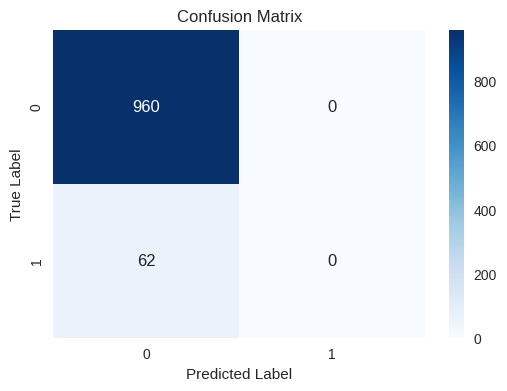

In [902]:
# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [903]:
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3901
           1       1.00      0.01      0.01       187

    accuracy                           0.95      4088
   macro avg       0.98      0.50      0.49      4088
weighted avg       0.96      0.95      0.93      4088



El modelo no es bueno para predecir cuando se puede tener un ictus

# 3 - Test sobre KNN

In [904]:
# Importar las librerias del modelo
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics

# Crear la instancia del modelo
clf = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo con los datos y la etiqueta
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [905]:
X

array([[ 1.05143428,  2.70637544,  1.00508597, ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.78607007,  2.12155854, -0.09898092, ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 1.62639008, -0.0050283 ,  0.47253605, ..., -0.45767615,
         1.30416474, -0.42731326],
       ...,
       [-0.36384151, -0.51144264,  0.22574463, ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 0.34379639,  1.32825706, -0.42370648, ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.03420481, -0.46086746, -0.34577235, ..., -0.45767615,
        -0.7667743 , -0.42731326]])

In [906]:
preds = clf.predict(X_test)
preds_train = clf.predict(X_train)
cm = confusion_matrix(y_test, preds)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


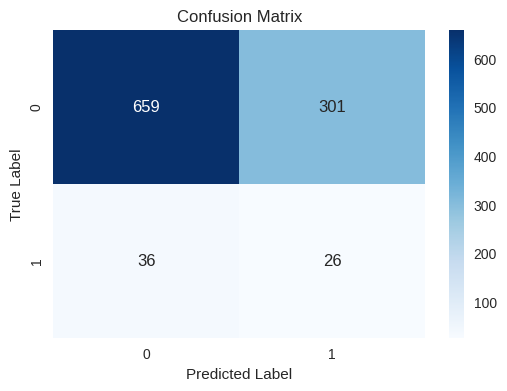

In [907]:
# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [908]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.6702544031311155

In [909]:
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81      3901
           1       0.07      0.51      0.13       187

    accuracy                           0.69      4088
   macro avg       0.52      0.60      0.47      4088
weighted avg       0.93      0.69      0.78      4088



El test sobre KNN tuvo la mejor perfomance sobre los demás con un f1-score de 13%, aún siendo bajo

#4 - Aprendizaje no supervisado: test sobre k-means

Dependencias

In [910]:
from sklearn.cluster import KMeans
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

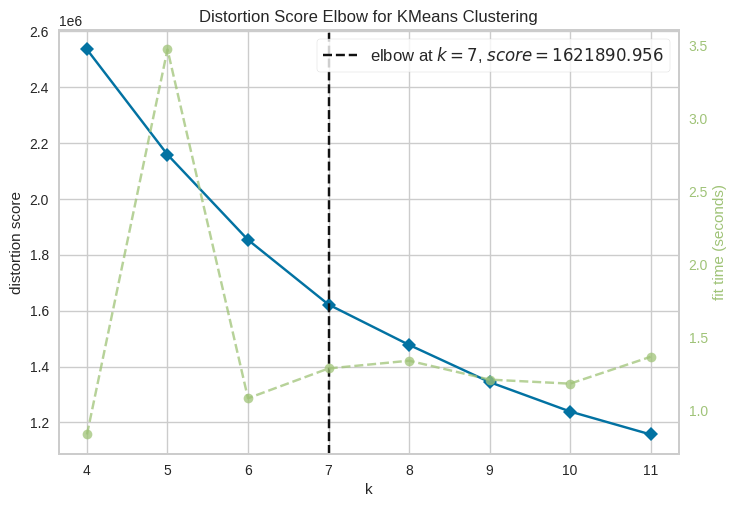

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [911]:
model = KMeans(n_clusters=7, n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(data_nuevo2)        # Entreno con los datos
visualizer.show()        # Renderizo la imagen

Es díficil a ciencia cierta determinar la posición del codo ya que el código cada vez que se corre da un gráfico distinto. Dada las herramientas que uno dispone, se procede igualmente a seguir con el modelo y testear según lo que me indica aún sabiendo que puede no ser lo correcto.

El modelo me está indicando un valor óptimo de k-means de 7.

In [912]:
# Estandarizo los datos
scaler = StandardScaler()
# los datos deben ser estandarizados ya que al tener las variables de entrada de diferente naturaleza, puede generar ruido en la segmentación.
df_final_scaled = scaler.fit_transform(data_nuevo2)
df_final_scaled

array([[ 1.05143428,  2.70637544,  4.41838074, ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.78607007,  2.12155854,  4.41838074, ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 1.62639008, -0.0050283 ,  4.41838074, ..., -0.45767615,
         1.30416474, -0.42731326],
       ...,
       [-0.36384151, -0.51144264, -0.22632726, ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 0.34379639,  1.32825706, -0.22632726, ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.03420481, -0.46086746, -0.22632726, ..., -0.45767615,
        -0.7667743 , -0.42731326]])

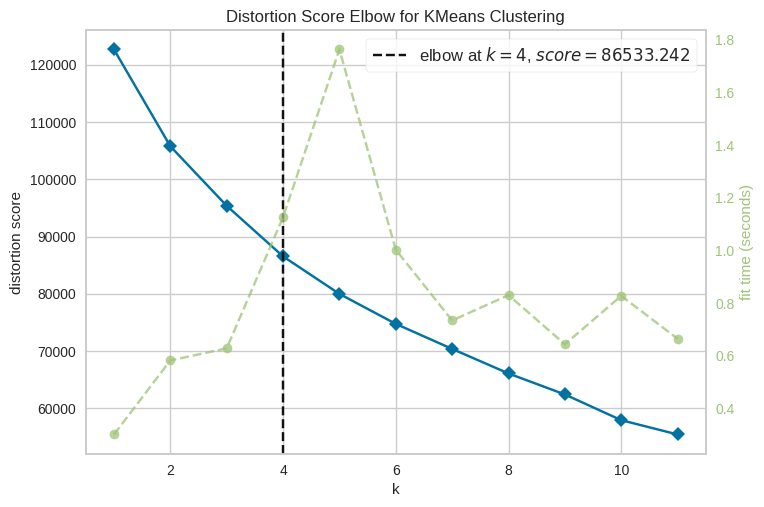

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [913]:
model = KMeans(n_clusters=6, n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df_final_scaled)        # Entrenamos con los datos
visualizer.show()

Como se menciona anterior, el gráfico puede ser que sea distinto cada vez que se corra el código. Sin embargo, nos está indicando un valor óptimo en 4. Se procede de esta manera a trabajar con este valor

In [914]:
modelo = KMeans(n_clusters=4, max_iter=1000, n_init=10, random_state=42)
preds = modelo.fit_predict(df_final_scaled)
preds

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [915]:
#armo un nuevo dataset con los valores nuevos de cada cluster
preds=pd.DataFrame(preds)
df_concat=pd.concat([data_frame_final, preds], axis=1)
df_concat=df_concat.rename(columns = {0:'cluster'})
df_concat

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi,cluster
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.6,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,28.1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.5,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.4,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0,28.1,3
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,40.0,1
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,30.6,1
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0,25.6,1


Se procede a hacer un análisis de cada cluster

#Análisis descriptivo de los clusters

In [916]:
df_concat.groupby(["cluster"])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,276.0,68.188406,11.613504,2.00,61.0,71.0,78.0,82.0
1,2766.0,52.263557,15.300804,18.00,40.0,52.0,63.0,82.0
2,1634.0,18.987760,14.549666,0.08,8.0,17.0,26.0,82.0
3,434.0,61.016129,14.179881,17.00,52.0,62.0,73.0,82.0


In [917]:
df_concat['stroke'] = df_concat['stroke'].astype('category')
df_concat.groupby(["cluster"])['stroke'].describe()

,count,unique,top,freq
cluster,,,,
0,276,2,0,229
1,2766,2,0,2626
2,1634,2,0,1625
3,434,2,0,381


In [918]:
df_concat.groupby(["cluster"])['gender'].describe()

,count,unique,top,freq
cluster,,,,
0,276,2,Male,163
1,2766,2,Female,1724
2,1634,3,Female,910
3,434,2,Female,247


In [919]:
cluster_0 = df_concat[df_concat.cluster.isin([0])]
cluster_1 = df_concat[df_concat.cluster.isin([1])]
cluster_2 = df_concat[df_concat.cluster.isin([2])]
cluster_3 = df_concat[df_concat.cluster.isin([3])]



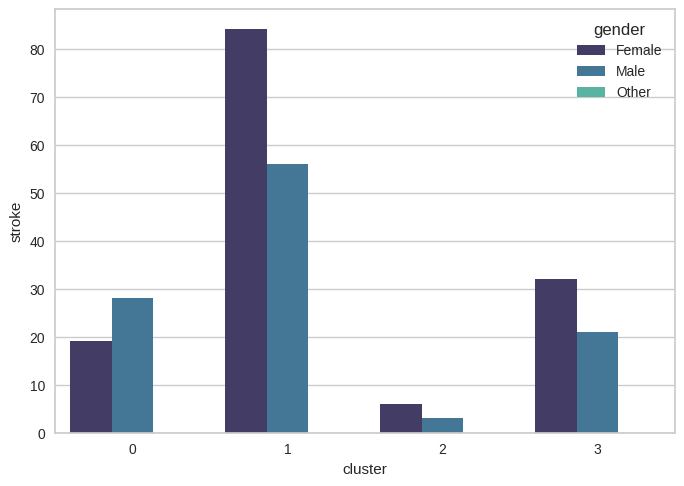

In [920]:
df_concat["stroke"]= df_concat["stroke"].astype(int)
sns.barplot(data= df_concat, x="cluster", y="stroke", hue="gender", errorbar=None, palette= "mako", estimator=np.sum)
f.tight_layout()

El cluster 1 tiene una mayor proporción de personas con ictus que los demás

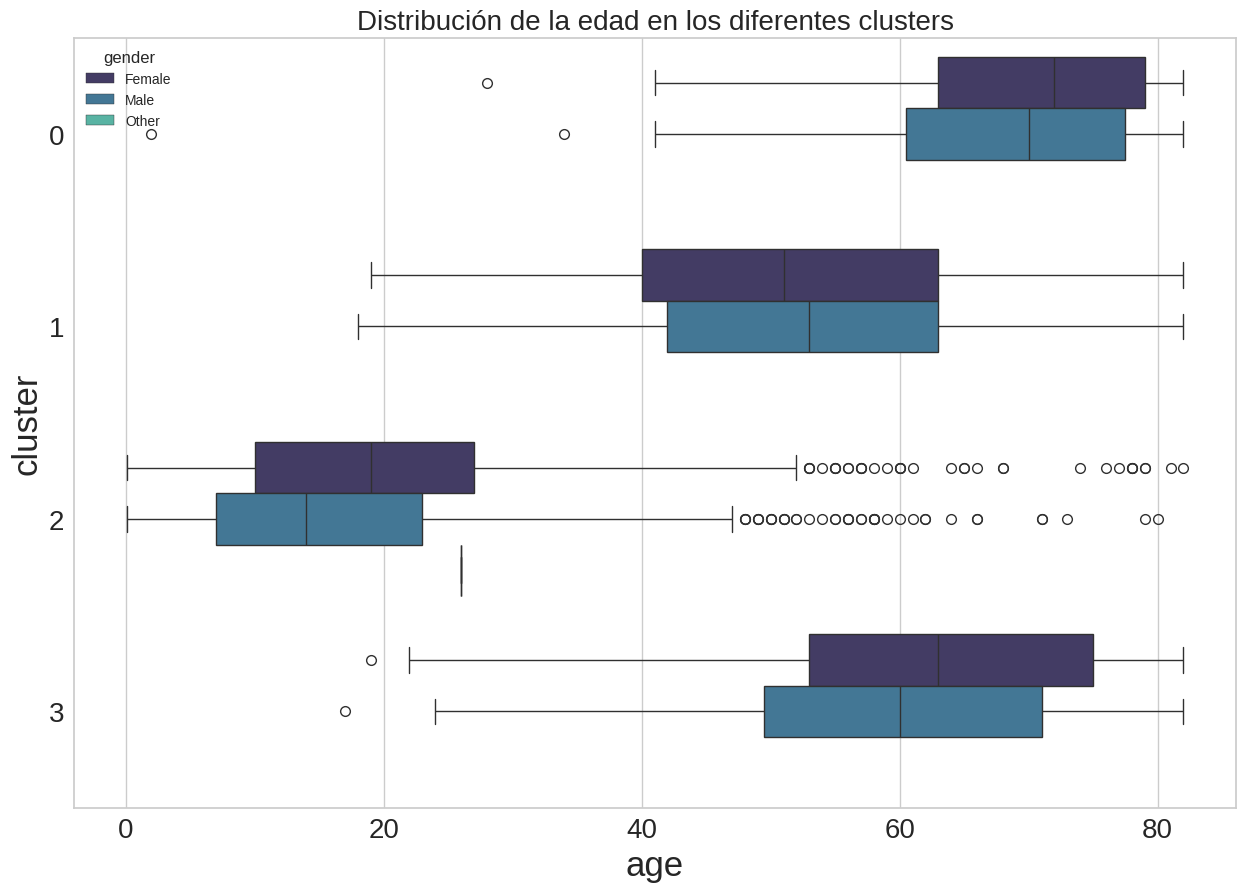

In [921]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

boxplot= sns.boxplot(data= df_concat, x="age", y="cluster",hue="gender", palette= "mako", orient="h")
boxplot.axes.set_title("Distribución de la edad en los diferentes clusters", fontsize=20)
boxplot.set_xlabel("age", fontsize=25)
boxplot.set_ylabel("cluster", fontsize=25)
plt.show()

In [922]:
cluster_3.describe()

,id,age,avg_glucose_level,bmi,cluster
count,434.000000,434.000000,434.000000,434.000000,434.0
mean,36098.767281,61.016129,127.089562,32.791475,3.0
std,21386.880653,14.179881,58.480310,8.737760,0.0
min,365.000000,17.000000,55.780000,15.000000,3.0
25%,17229.250000,52.000000,80.407500,28.100000,3.0
50%,34969.000000,62.000000,102.215000,31.000000,3.0
75%,55801.250000,73.000000,186.172500,36.375000,3.0
max,72918.000000,82.000000,267.600000,97.600000,3.0


In [923]:
cluster_1.describe(include='category')

,gender,hypertension,heart_disease,stroke
count,2766,2766,2766,2766
unique,2,1,1,2
top,Female,0,0,0
freq,1724,2766,2766,2626


In [924]:
cluster_0.describe(include='category')

,gender,hypertension,heart_disease,stroke
count,276,276,276,276
unique,2,2,1,2
top,Male,0,1,0
freq,163,212,276,229


In [925]:
cluster_2.describe(include='category')

,gender,hypertension,heart_disease,stroke
count,1634,1634,1634,1634
unique,3,1,1,2
top,Female,0,0,0
freq,910,1634,1634,1625


In [926]:
cluster_3.describe(include='category')

,gender,hypertension,heart_disease,stroke
count,434,434,434,434
unique,2,1,1,2
top,Female,1,0,0
freq,247,434,434,381


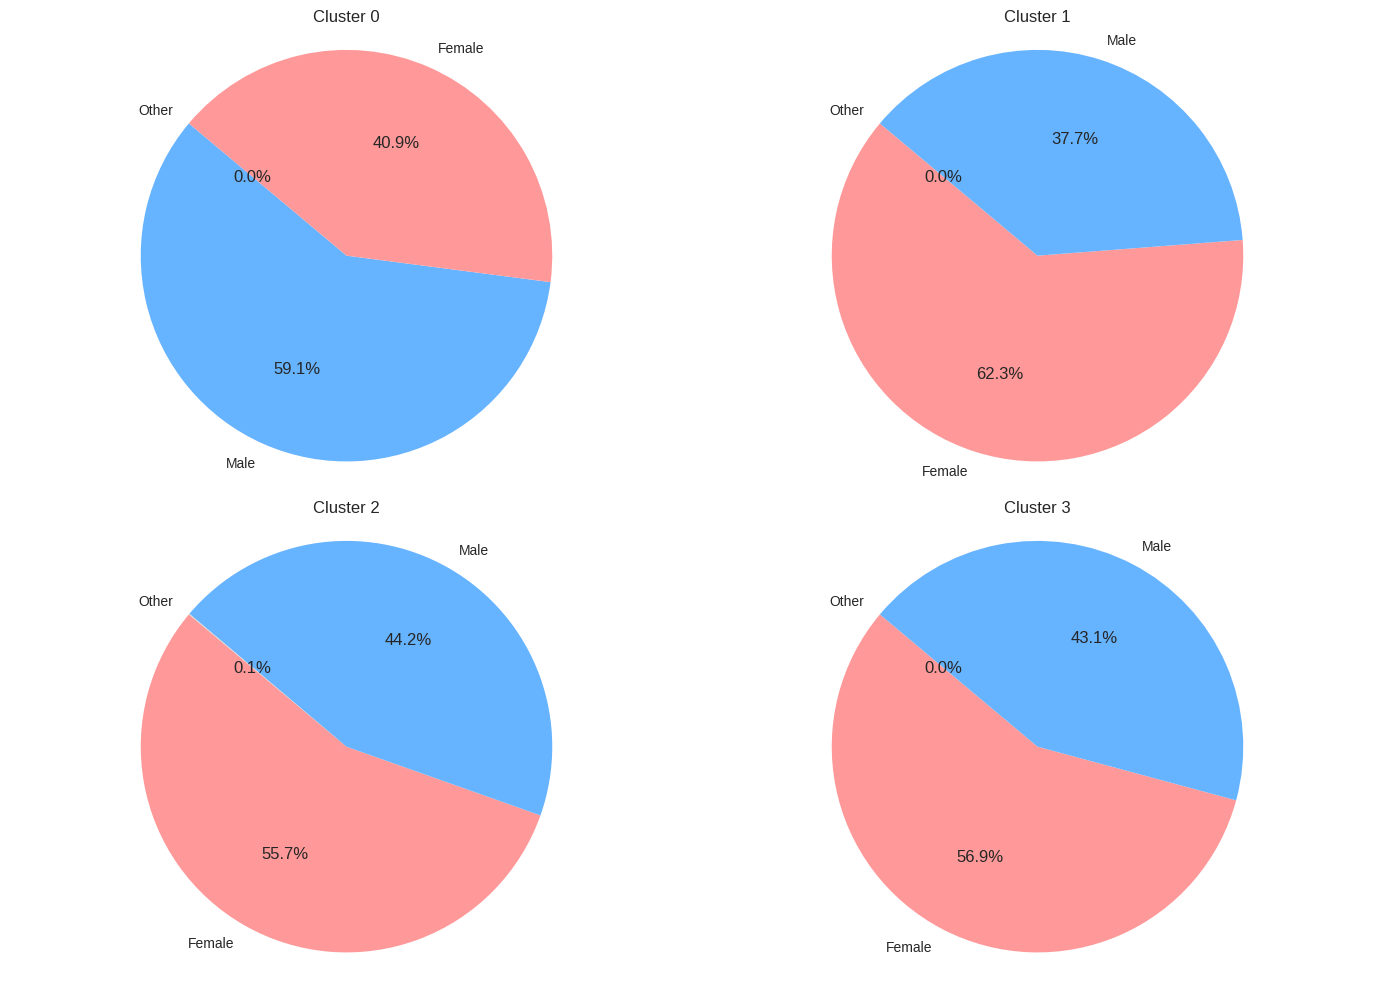

In [927]:
# Contar la cantidad de cada género
gender_counts0 = cluster_0['gender'].value_counts()
gender_counts1 = cluster_1['gender'].value_counts()
gender_counts2 = cluster_2['gender'].value_counts()
gender_counts3 = cluster_3['gender'].value_counts()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
# Crear el gráfico de tortas
titles = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

# Contadores de género
gender_counts = [gender_counts0, gender_counts1, gender_counts2, gender_counts3]

color_map = {'Male': '#66b3ff', 'Female': '#ff9999', 'Other':'#d3d3d3'}



# Crear los cuatro gráficos de tortas
for i, ax in enumerate(axs.flat):
    colors = [color_map[gender] for gender in gender_counts[i].index]
    ax.pie(gender_counts[i], labels=gender_counts[i].index, autopct='%1.1f%%', startangle=140, colors=colors)
    ax.set_title(titles[i])
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Ajustar el layout
plt.tight_layout()
plt.show()

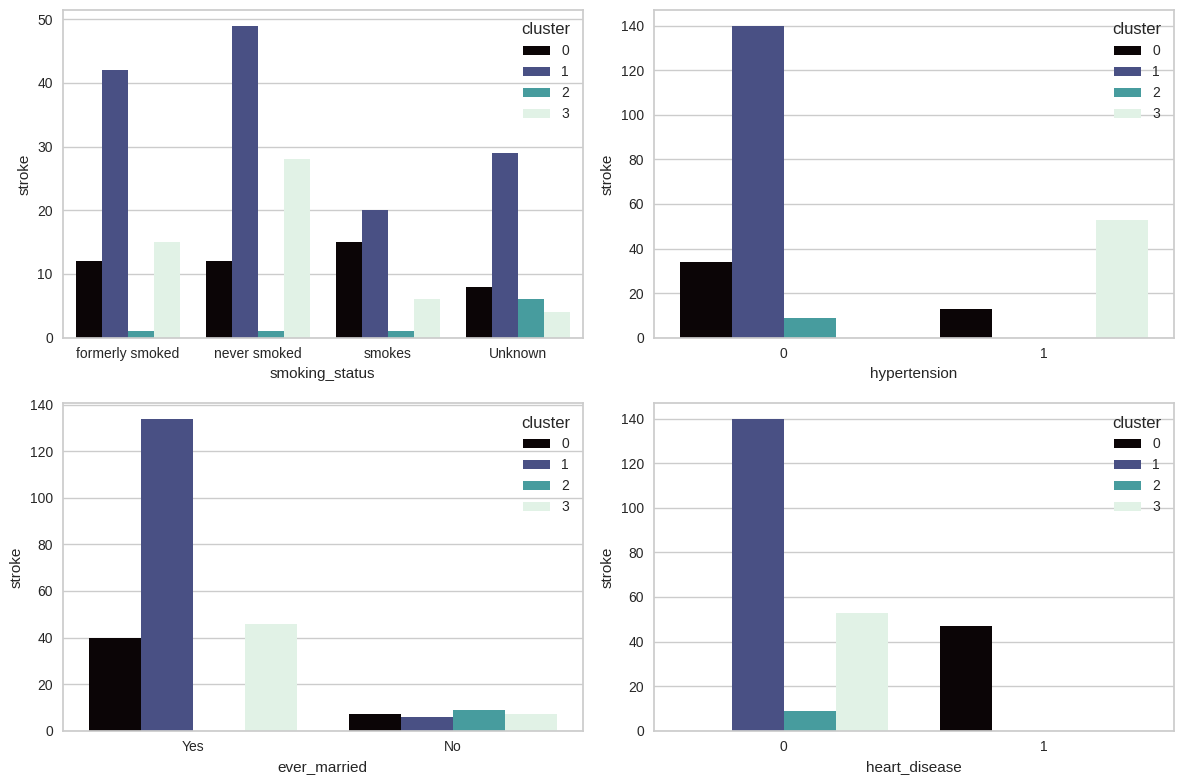

In [928]:

f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4]))
sns.barplot(data= df_concat, x="smoking_status", y="stroke", hue="cluster", ax=axs[0,0], errorbar=None, palette= "mako", estimator=np.sum)
sns.barplot(data= df_concat, x="hypertension", y="stroke", hue="cluster", ax=axs[0,1], errorbar=None, palette= "mako", estimator=np.sum)
sns.barplot(data= df_concat, x="ever_married", y="stroke", hue="cluster", ax=axs[1,0], errorbar=None, palette= "mako", estimator=np.sum)
sns.barplot(data= df_concat, x="heart_disease", y="stroke", hue="cluster", ax=axs[1,1], errorbar=None, palette= "mako", estimator=np.sum)
f.tight_layout()

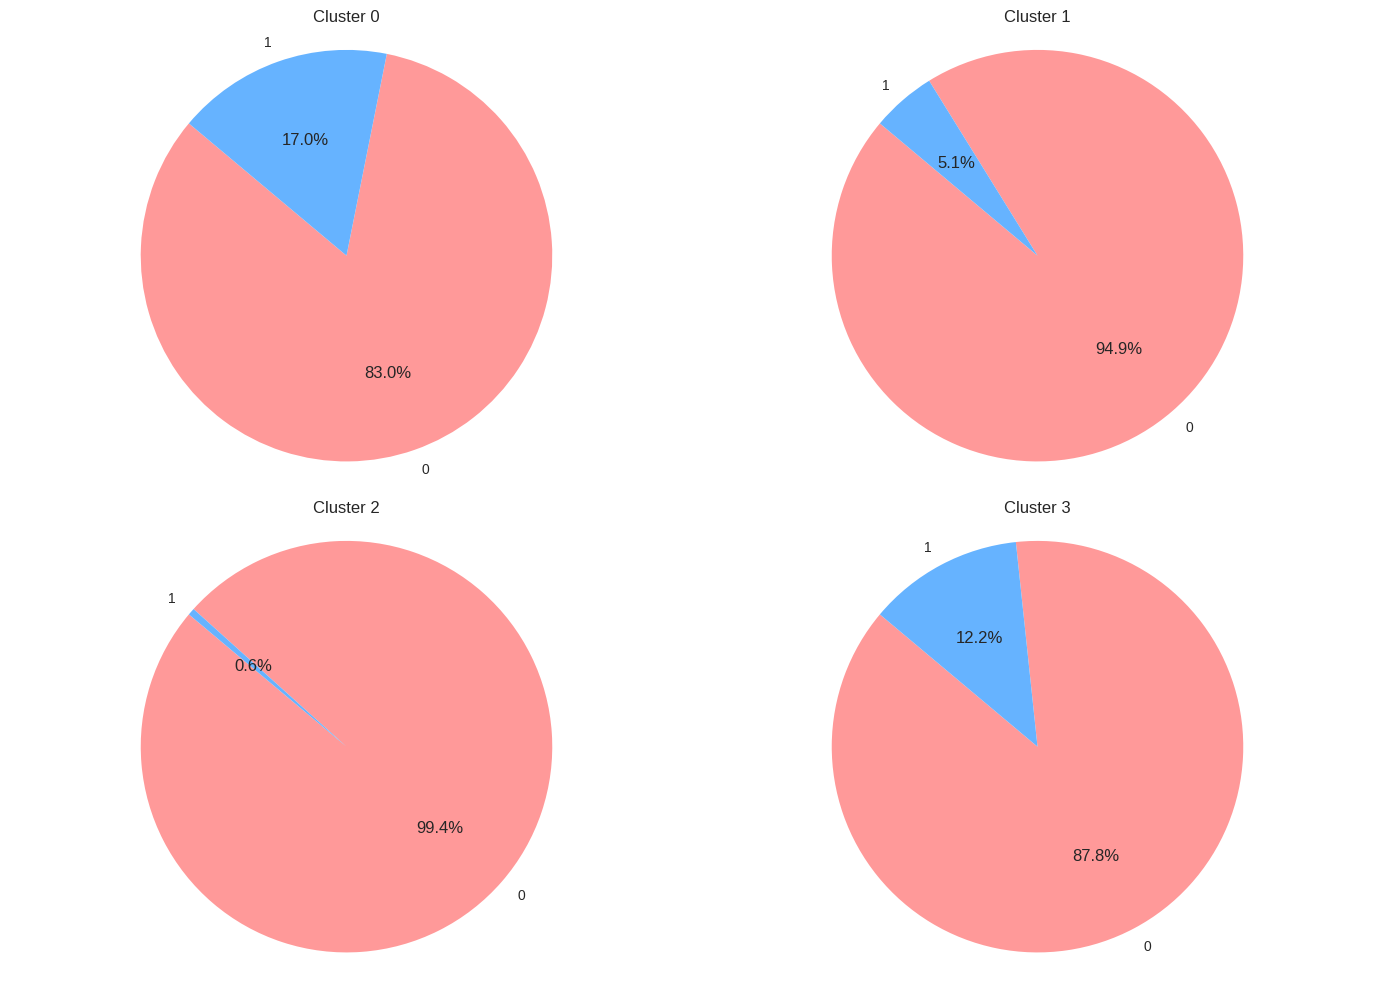

In [929]:
# Contar la cantidad de cada género
stroke_counts0 = cluster_0['stroke'].value_counts()
stroke_counts1 = cluster_1['stroke'].value_counts()
stroke_counts2 = cluster_2['stroke'].value_counts()
stroke_counts3 = cluster_3['stroke'].value_counts()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
# Crear el gráfico de tortas
titles = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

# Contadores de género
stroke_counts = [stroke_counts0, stroke_counts1, stroke_counts2, stroke_counts3]

# Crear los cuatro gráficos de tortas
for i, ax in enumerate(axs.flat):
    ax.pie(stroke_counts[i], labels=stroke_counts[i].index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    ax.set_title(titles[i])
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Ajustar el layout
plt.tight_layout()
plt.show()

#AnálIsis por PCA

<Axes: >

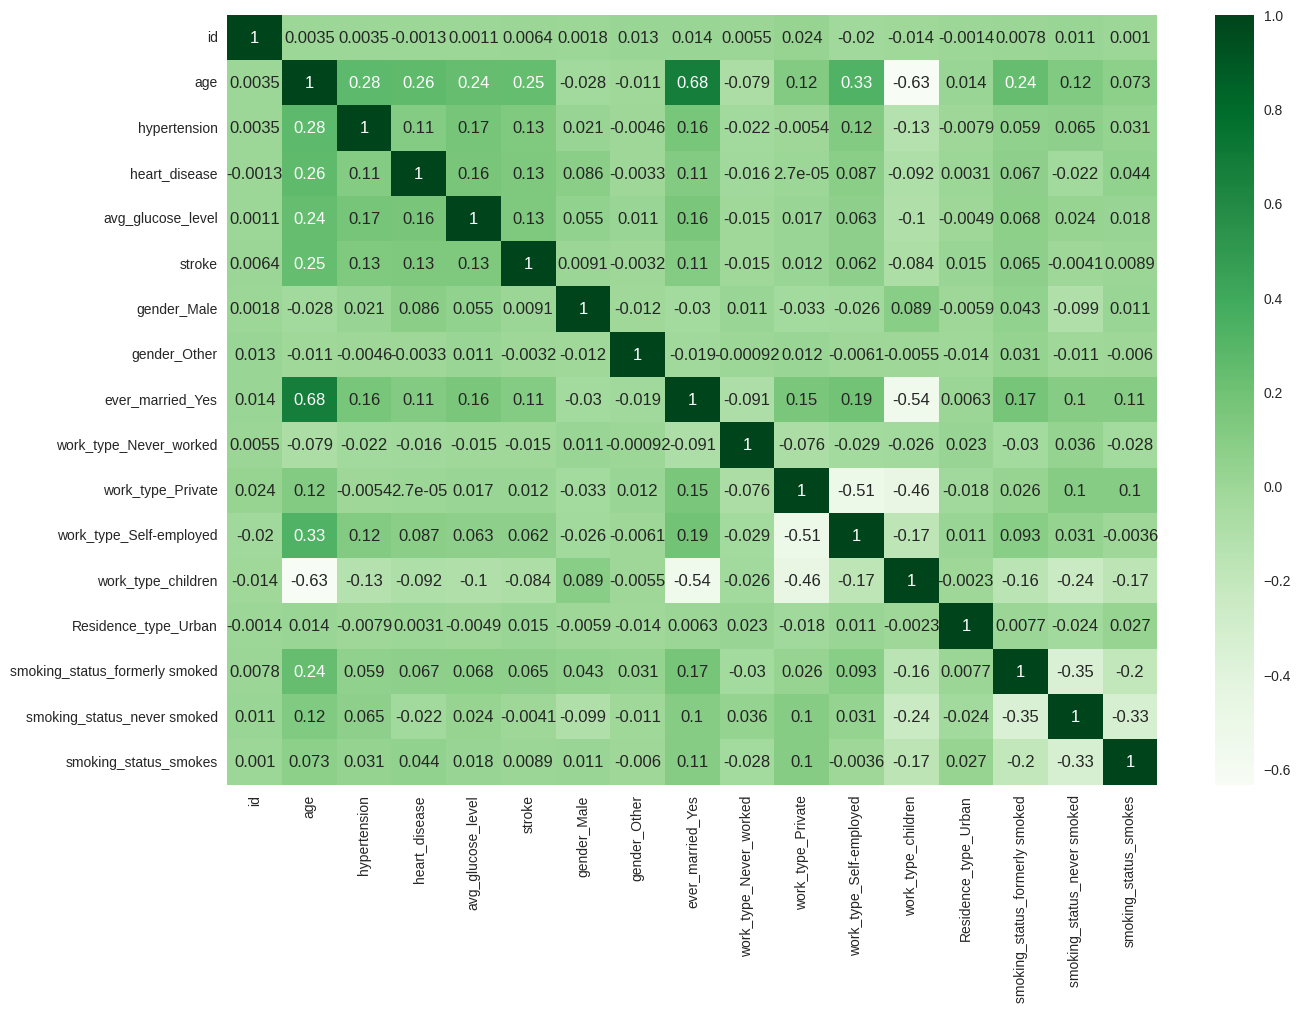

In [930]:
dff=pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'],
               drop_first=True)
plt.figure(figsize=(15,10))
sns.heatmap(dff.corr(),annot=True,cmap='Greens')

La edad tiene una muy buena correlación a la hora de predecir un ictus.

#Conclusiones

Se utilizaron tres modelos de clasificación, con el fin de predecir cuando ocurre un ACV. El único que obtuvo mejor desempeño fue el test sobre KNN.
Una de las variables principales a la hora de predecir el hecho es la edad como lo muestra el análsis de PCA. El haber fumado o ser fumador no prueba ser un factor determinante en la ocurrencia de dicho accidente.
De acuerdo al test sobre K-means, los grupos que tienen una mayor frecuencia de ictus, son aquellos que en promedio tienen edades de entre 60 y 70 años.